In [108]:
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
import numpy as np

In [3]:
filename = 'POWER.csv'
df = pd.read_csv(filename, sep=',')

In [4]:
df.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,T2MDEW,T2M,KT_CLEAR,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN
0,50.07731,20.76851,2015,1,1,1.24,0.003181,-2.60,-1.53,0.15,0.15,-999.00,0.32,6.72
1,50.07731,20.76851,2015,1,2,2.19,0.003805,-0.21,1.11,0.33,0.33,-999.00,0.68,6.59
2,50.07731,20.76851,2015,1,3,0.29,0.003614,-0.92,1.01,0.36,0.36,0.99,0.77,6.43
3,50.07731,20.76851,2015,1,4,2.34,0.003337,-2.06,-0.17,0.34,0.34,-999.00,0.72,6.43
4,50.07731,20.76851,2015,1,5,0.73,0.003015,-3.27,-1.43,0.30,0.30,-999.00,0.64,6.24


In [ ]:
# uzysk => 
tdf = pd.read_csv('1.csv', sep=',', skiprows=1)
for filename in ['2.csv', '3.csv']:
    ndf = pd.read_csv(filename, sep=',', skiprows=1)
    tdf = pd.concat([tdf, ndf], ignore_index=True)
tdf.reset_index()

In [47]:
df['Gain'] = tdf['[kWh].3']

In [100]:
df.describe()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,T2MDEW,T2M,KT_CLEAR,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,Gain
count,1.095000e+03,1.095000e+03,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,5.007731e+01,2.076851e+01,2016.00000,6.516895,15.722374,1.977516,0.006103,5.038712,9.114922,-2.353909,-2.353909,-729.629954,1.002530,7.427388,16.521050
std,4.691725e-13,4.051944e-13,0.81687,3.448158,8.802817,3.835302,0.002709,6.740678,8.977327,52.262585,52.262585,444.827667,42.846249,1.071767,14.141909
min,5.007731e+01,2.076851e+01,2015.00000,1.000000,1.000000,0.000000,0.000748,-18.590000,-17.340000,-999.000000,-999.000000,-999.000000,-999.000000,3.930000,0.000000
25%,5.007731e+01,2.076851e+01,2015.00000,4.000000,8.000000,0.050000,0.003894,0.050000,2.085000,0.230000,0.230000,-999.000000,0.930000,6.670000,3.650000
50%,5.007731e+01,2.076851e+01,2016.00000,7.000000,16.000000,0.460000,0.005515,4.960000,8.290000,0.390000,0.390000,-999.000000,2.350000,7.400000,12.170000
75%,5.007731e+01,2.076851e+01,2017.00000,10.000000,23.000000,2.190000,0.008154,10.560000,16.790000,0.540000,0.540000,0.990000,4.560000,8.245000,28.690000
max,5.007731e+01,2.076851e+01,2017.00000,12.000000,31.000000,33.880000,0.013980,18.970000,28.920000,0.670000,0.670000,7.530000,7.450000,9.850000,51.800000


In [116]:
df = df[df['PRECTOT'] != -9.990e+02]
df = df[df['ALLSKY_SFC_SW_DWN'] != -999.0]
df = df[df['KT'] != -999.0]
df = df[df['KT_CLEAR'] != -999.0]

print(df.columns)
print(df.dtypes)

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'QV2M', 'T2MDEW', 'T2M',
       'KT_CLEAR', 'KT', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'Gain'],
      dtype='object')
LAT                  float64
LON                  float64
YEAR                   int64
MO                     int64
DY                     int64
PRECTOT              float64
QV2M                 float64
T2MDEW               float64
T2M                  float64
KT_CLEAR             float64
KT                   float64
CLRSKY_SFC_SW_DWN    float64
ALLSKY_SFC_SW_DWN    float64
ALLSKY_SFC_LW_DWN    float64
Gain                 float64
dtype: object


In [170]:
from sklearn.model_selection import train_test_split
usef_df = df[['LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'QV2M', 'T2MDEW', 'T2M',
       'KT_CLEAR', 'KT', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'Gain']]
train_labs = ['MO','PRECTOT', 'QV2M', 'T2MDEW', 'T2M',
       'KT_CLEAR', 'KT', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN']

X_train, X_test, y_train, y_test = train_test_split(usef_df[train_labs],
                                                    usef_df['Gain'], 
                                                    test_size=0.3, 
                                                    random_state=0)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(copy=True, with_mean=True, with_std=False)
# X_train = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
# X_test = scaler.fit_transform(X_test)
# y_test = scaler.fit_transform(y_test.values.reshape(-1, 1))
# pca = PCA(n_components=8)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)


# print(pca.explained_variance_)
# print(pca.explained_variance_ratio_)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [179]:
clfs = [
    RandomForestRegressor(random_state=0, n_estimators = 100, min_samples_leaf=4, min_impurity_decrease=0.2),
    RandomForestRegressor(random_state=0, n_estimators = 100, min_samples_leaf=4, min_impurity_decrease=0.1),
    RandomForestRegressor(random_state=0, n_estimators = 100, min_samples_leaf=4, min_impurity_decrease=0.7),    
    RandomForestRegressor(random_state=0, n_estimators = 200, min_samples_leaf=3),    
    RandomForestRegressor(random_state=0, n_estimators = 300, min_samples_leaf=2),    
    GradientBoostingRegressor(n_estimators=200),
    GradientBoostingRegressor(n_estimators=200, loss='lad'),
    GradientBoostingRegressor(n_estimators=200, criterion='mae'),
    GradientBoostingRegressor(n_estimators=200, loss='huber', alpha=0.2),
    GradientBoostingRegressor(n_estimators=600, loss='huber', alpha=0.3, tol=1e-7),
    GradientBoostingRegressor(n_estimators=500, loss='huber', alpha=0.85),
]
for clf in clfs:
    try:
        clf.fit(X_train, y_train.reshape(-1, ))
        print(clf.score(X_test, y_test.reshape(-1, )))
    except:
        clf.fit(X_train, y_train)
        print(clf.score(X_test, y_test))

0.9292121760632674
0.9308674551832301
0.9201398000591066
0.9332047360479558
0.934330722336649
0.9362593028291221
0.93545582017062
0.9304522925291275
0.9333318947380962
0.9332504388554698
0.9345124177241749


0.9341485051018218
MO:0.006995194100067041
PRECTOT:0.00648328348941117
QV2M:0.004281580297787848
T2MDEW:0.00376175804902095
T2M:0.014648647379146043
KT_CLEAR:0.005200489097906883
KT:0.011842741049412702
ALLSKY_SFC_SW_DWN:0.93707163388927
ALLSKY_SFC_LW_DWN:0.009714672647977454


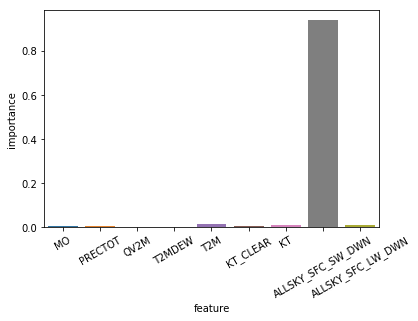

In [188]:
tst_clf =  GradientBoostingRegressor(n_estimators=200, loss='huber')
tst_clf.fit(X_train, y_train)
print(tst_clf.score(X_test, y_test))
for col, imp in zip(X_train.columns, clf.feature_importances_):
    print(f'{col}:{imp}')
import_df = pd.DataFrame({'feature': X_train.columns, 
                          'importance': clf.feature_importances_})
g =sns.barplot(x='feature', y='importance', data=import_df)
_ = g.set_xticklabels(rotation=30, labels=import_df['feature'].values)
# import_df.head()

In [ ]:
usef_df = df[['LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'QV2M', 'T2MDEW', 'T2M',
       'KT_CLEAR', 'KT', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN']]
train_labs = ['MO','PRECTOT', 'QV2M', 'T2MDEW', 'T2M',
       'KT_CLEAR', 'KT', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN']

X_train, X_test, y_train, y_test = train_test_split(usef_df[train_labs],
                                                    usef_df['Gain'], 
                                                    test_size=0.3, 
                                                    random_state=0)
clfs = [
    RandomForestRegressor(random_state=0, n_estimators = 100, min_samples_leaf=4, min_impurity_decrease=0.2),
    RandomForestRegressor(random_state=0, n_estimators = 100, min_samples_leaf=4, min_impurity_decrease=0.1),
    RandomForestRegressor(random_state=0, n_estimators = 100, min_samples_leaf=4, min_impurity_decrease=0.7),    
    RandomForestRegressor(random_state=0, n_estimators = 200, min_samples_leaf=3),    
    RandomForestRegressor(random_state=0, n_estimators = 300, min_samples_leaf=2),    
    GradientBoostingRegressor(n_estimators=200),
    GradientBoostingRegressor(n_estimators=200, loss='lad'),
    GradientBoostingRegressor(n_estimators=200, criterion='mae'),
    GradientBoostingRegressor(n_estimators=200, loss='huber', alpha=0.2),
    GradientBoostingRegressor(n_estimators=600, loss='huber', alpha=0.3, tol=1e-7),
    GradientBoostingRegressor(n_estimators=500, loss='huber', alpha=0.85),
]
for clf in clfs:
    try:
        clf.fit(X_train, y_train.reshape(-1, ))
        print(clf.score(X_test, y_test.reshape(-1, )))
    except:
        clf.fit(X_train, y_train)
        print(clf.score(X_test, y_test))